In [1264]:
import cirq
import numpy as np
from cirq.contrib.svg import SVGCircuit
import imp
import LQG
from LQG import tetrahedra_circuits as tc
from LQG import tetrahedra_num as tn
from LQG import tests
imp.reload(LQG.tetrahedra_circuits)
imp.reload(LQG.tetrahedra_num)
imp.reload(LQG.tests)

bris = cirq.google.Bristlecone
strat=cirq.InsertStrategy.NEW_THEN_INLINE

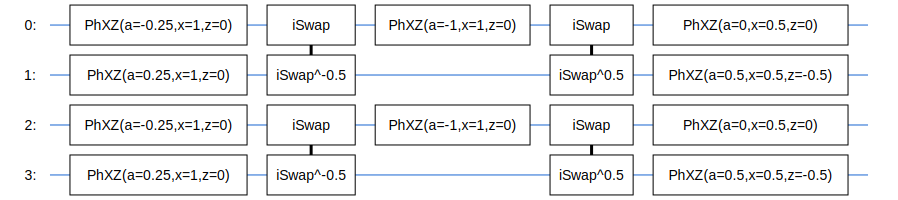

In [1299]:
#print(tn.)
SVGCircuit(cirq.Circuit(tc.ZeroTet(qubits[:4])))

In [1140]:
''' test the circuit generation for arbitrary theta,phi
'''
for theta in [0.,np.pi,np.pi/2,np.pi/4]:
    for phi in [0.,np.pi/3,np.pi/2]:
        tests.test_init_vec(theta,phi)
''' test that the constant defined intertwiner states are correct
'''
tests.test_polarizations()  
''' are the polarized tetrahedra correct 
'''
tests.test_circuit_polarizations()

Testing theta,phi 0.0000, 0.0000 -> overlap 1.0000, passed!
Testing theta,phi 0.0000, 1.0472 -> overlap 1.0000, passed!
Testing theta,phi 0.0000, 1.5708 -> overlap 1.0000, passed!
Testing theta,phi 3.1416, 0.0000 -> overlap 1.0000, passed!
Testing theta,phi 3.1416, 1.0472 -> overlap 1.0000, passed!
Testing theta,phi 3.1416, 1.5708 -> overlap 1.0000, passed!
Testing theta,phi 1.5708, 0.0000 -> overlap 1.0000, passed!
Testing theta,phi 1.5708, 1.0472 -> overlap 0.2500, failed! :(
Testing theta,phi 1.5708, 1.5708 -> overlap 0.0000, failed! :(
Testing theta,phi 0.7854, 0.0000 -> overlap 1.0000, passed!
Testing theta,phi 0.7854, 1.0472 -> overlap 0.6250, failed! :(
Testing theta,phi 0.7854, 1.5708 -> overlap 0.5000, failed! :(
passed!
passed!


0000 248
1111 259
1100 250
0011 243
circuit is 11 moments
Expectation |0>:  0.248


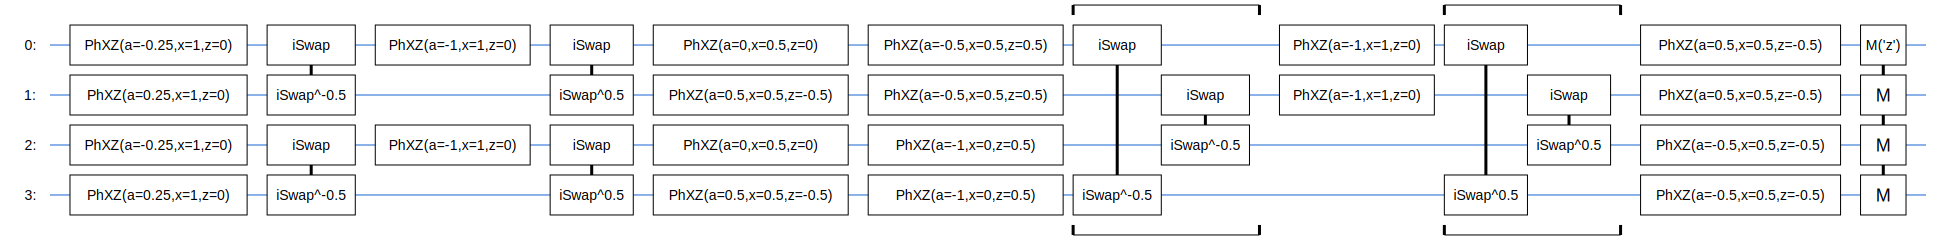

In [1265]:
''' monopole spin starting in |0>
'''
N = 4
qubits = cirq.LineQubit.range(N)
circuit = cirq.Circuit(tc.ZeroTet(qubits), strategy=strat)
circuit.append(tc.to_gateset(tc.entangle_tets(qubits,[(0,3),(1,2)])))
circuit.append(cirq.measure(*qubits,key='z'))

sim = cirq.Simulator()
reps = 1000
results = sim.run(circuit,repetitions=reps)
hist = results.histogram(key='z')

for key,item in hist.items():
    print(tc.binformat(N).format(key), item)

print('circuit is {} moments'.format(len(circuit)))    
# should be ~.25
print('Expectation |0>: ', hist[0]/reps)
SVGCircuit(circuit)

0000 747
0011 90
1111 81
1100 82
circuit is 54 moments
Expectation |0>:  0.747


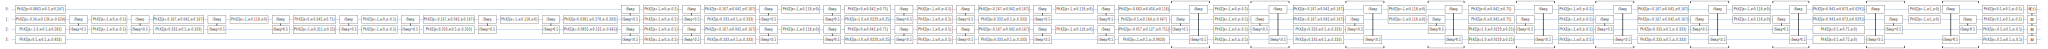

In [1225]:
''' monopole spin starting in |1>
'''
N = 4
reps = 1000

qubits = cirq.LineQubit.range(N)
circuit = cirq.Circuit(tc.OneTet(qubits), strategy=strat)
circuit.append(tc.entangle_tets(qubits,[(0,3),(1,2)]))
circuit = tc.to_gateset(circuit)
circuit.append(cirq.measure(*qubits,key='z'))

sim = cirq.Simulator()
results = sim.run(circuit,repetitions=reps)
hist = results.histogram(key='z')
for key,item in hist.items():
    print(tc.binformat(N).format(key),item)
    
print('circuit is {} moments'.format(len(circuit)))
# should be ~.75
print('Expectation |0>: ', hist[0]/reps)
SVGCircuit(circuit)

In [1217]:
''' dipole spin starting in |0>
'''
N = 8
reps = 10000

qubits = cirq.LineQubit.range(N)
circuit = cirq.Circuit(tc.ZeroTet(qubits[:4]),tc.ZeroTet(qubits[4:]))
circuit.append(tc.entangle_tets(qubits,[(0,4),(1,5),(2,6),(3,7)]))
circuit.append(cirq.measure(*qubits,key='z'))
circuit = tc.to_gateset(circuit)

sim = cirq.Simulator()
results = sim.run(circuit, repetitions=reps)
hist = results.histogram(key='z')

print('circuit is {} moments'.format(len(circuit)))
# should be ~.0625
print('Expectation 0: ',hist[0]/reps)

circuit is 10 moments
Expectation 0:  0.0615


In [1218]:
''' dipole spin starting in |1> 
'''
N = 8
reps = 1000

qubits = cirq.LineQubit.range(N)
circuit = cirq.Circuit(tc.OneTet(qubits[:4]),tc.OneTet(qubits[4:]))
circuit.append(tc.entangle_tets(qubits,[(0,4),(1,5),(2,6),(3,7)]))
circuit.append(cirq.measure(*qubits,key='z'))
circuit = tc.to_gateset(circuit)

sim = cirq.Simulator()
results = sim.run(circuit,repetitions=reps)
hist = results.histogram(key='z')

print('circuit is {} moments'.format(len(circuit)))
# should be ~.0625
print('Expectation 0: ',hist[0]/reps)

circuit is 54 moments
Expectation 0:  0.063


In [1148]:
''' tripole spin
'''
N = 12
reps = 10000

qubits = cirq.LineQubit.range(N)
circuit = cirq.Circuit(tc.ZeroTet(qubits[:4]),tc.ZeroTet(qubits[4:8]),tc.ZeroTet(qubits[8:]))
circuit.append(tc.entangle_tets(qubits,[(0,4),(1,5),(2,10),(3,11),(6,8),(7,9)]))
circuit.append(cirq.measure(*qubits,key='z'))
circuit = tc.to_gateset(circuit)

sim = cirq.Simulator()
hist = sim.run(circuit,repetitions=reps).histogram(key='z')

print('circuit is {} moments'.format(len(circuit)))
# not completely sure about the theoretical values here
print('Expectation 0: ',hist[0]/reps)

circuit is 10 moments
Expectation 0:  0.0165


8
(0.0019531248+0j) 0.0019531248
3.8146963561303524e-06
[ 0.00195312+0.j -0.        +0.j -0.        +0.j -0.00195312+0.j
 -0.        +0.j  0.00195312+0.j -0.00195312+0.j -0.        +0.j
 -0.        +0.j -0.00195312+0.j  0.00195312+0.j -0.        +0.j
 -0.00195312+0.j -0.        +0.j -0.        +0.j  0.00195312+0.j
 -0.        +0.j  0.00195312+0.j -0.00195312+0.j -0.        +0.j]
finding abnormal states
0 0.00195
done with numerical
target:  0.00390625
0.0
0.0
0.0
0.0
0.0
0.0001
0.0
0.0
0.0
0.0
1e-05


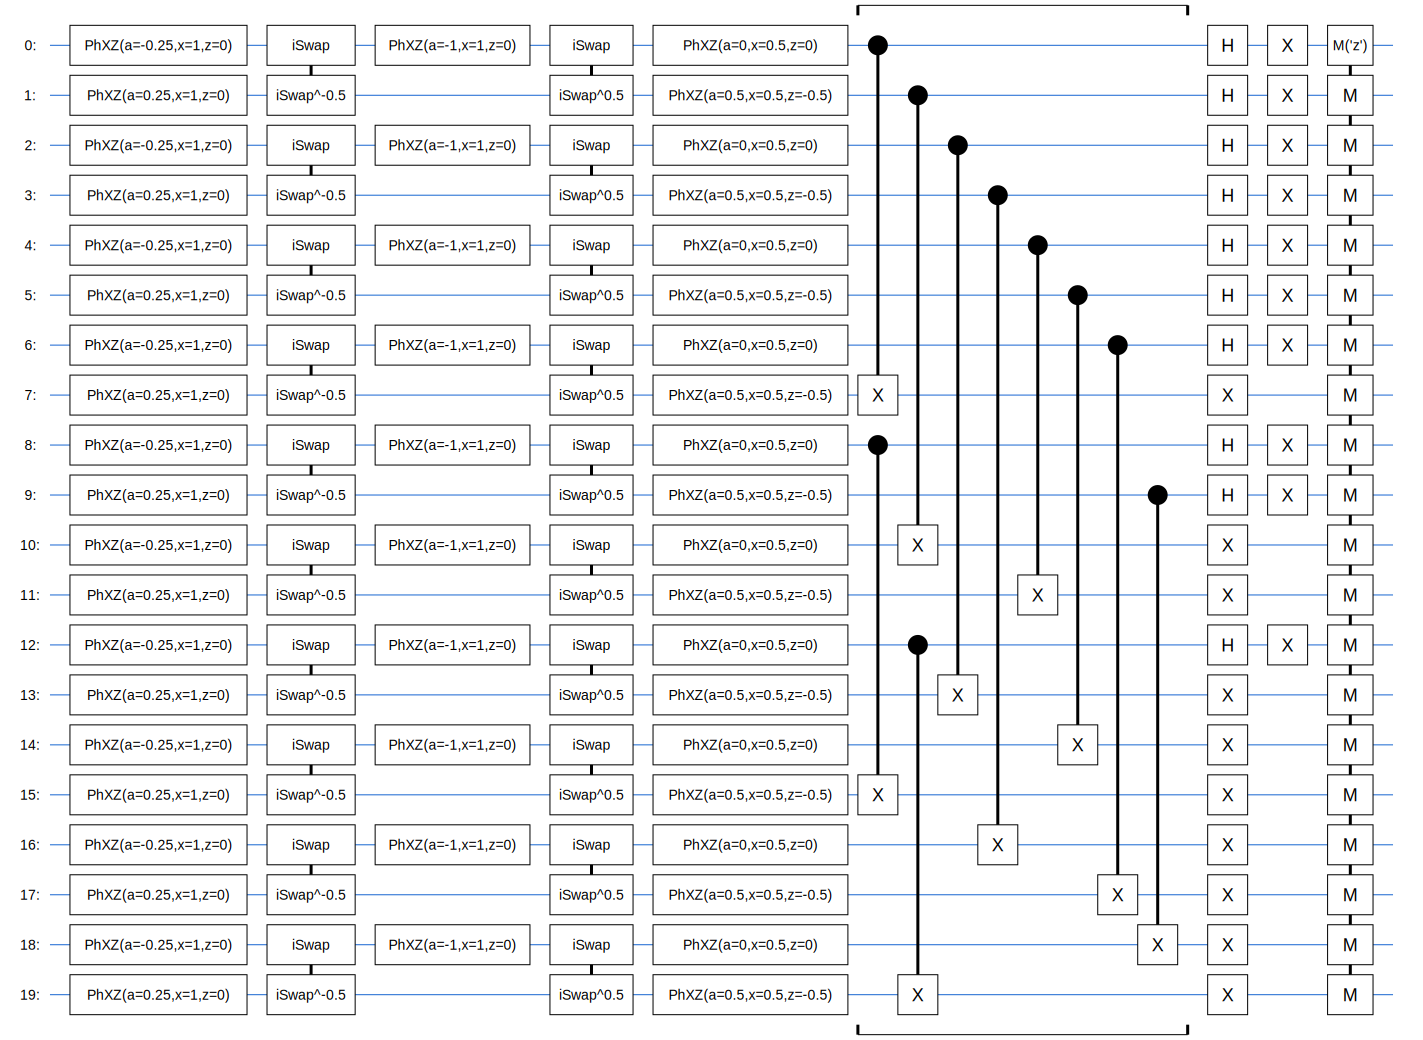

In [1298]:
''' 20 maybe it will work 
'''
# 2^20 * 64 bits
N = 20
reps = 10000

qubits = cirq.LineQubit.range(N)
circuit = cirq.Circuit()

tets = [cirq.Circuit(tc.ZeroTet(qubits[(i*4):(i*4+4)])) for i in range(5)]
#tets = [tc.RightTet(qubits[(i*4):(i*4+4)]) for i in range(5)]
#tets = [cirq.Circuit(tc.ZeroTet(qubits[0:4]), tc.OneTet(qubits[4:8]), tc.ZeroTet(qubits[8:12]),
#                     tc.OneTet(qubits[12:16]),tc.PlusTet(qubits[16:]))]
for i,_ in enumerate(tets[0]): # we know these are parallel
    m = []
    for t in tets:
        m.append(t[i])
    circuit.append(cirq.Moment(m))

#circuit.append(cirq.X.on_each([qubits[i] for i in [2,3,6,7,10,11,14,15,18,19]]))
circuit.append(
    #tc.to_gateset(
        tc.entangle_tets(qubits, 
        [(0,7),(1,10),(2,13),(3,16), # this one is the spin network represented in https://arxiv.org/pdf/2004.12911.pdf
         (4,11),(5,14),(6,17),
         (8,15),(9,18),
         (12,19)
            #(19,0),(18,5),(14,1),(6,13),
            #(2,9),(10,17),(3,4),(7,8),
            #(11,12),(15,16)
        ],
        #exp=.75
    )#)
)

#circuit.append(cirq.rz(np.pi/2).on_each(qubits[::2]))
print(len(circuit))
v = tc.final_state(circuit)
circuit.append(cirq.measure(*qubits,key='z'))

print(v[0], np.abs(v[0]))
print(np.abs(v[0])**2)
print(v[:20])
print('finding abnormal states')
for idx,i in enumerate(v):
    i = str(round(np.abs(i),ndigits=5))
    if i != str(0.):# and i != str(0.00195):
        print(idx, i)
        break
        
print('done with numerical')
print('target: ', .0625**2)

avg = []
samples = 10
for i in range(samples):
    sim = cirq.Simulator()
    hist = sim.run(circuit,repetitions=reps).histogram(key='z')
    
    #for key,item in hist.items():
    #    s = tc.binformat(20).format(key)
        
    # 000000000000 0101 0101
    # expect .0625**2
    print(hist[0]/reps)
    avg.append(hist[0]/reps)
print(sum(avg)/samples) 
SVGCircuit(circuit)

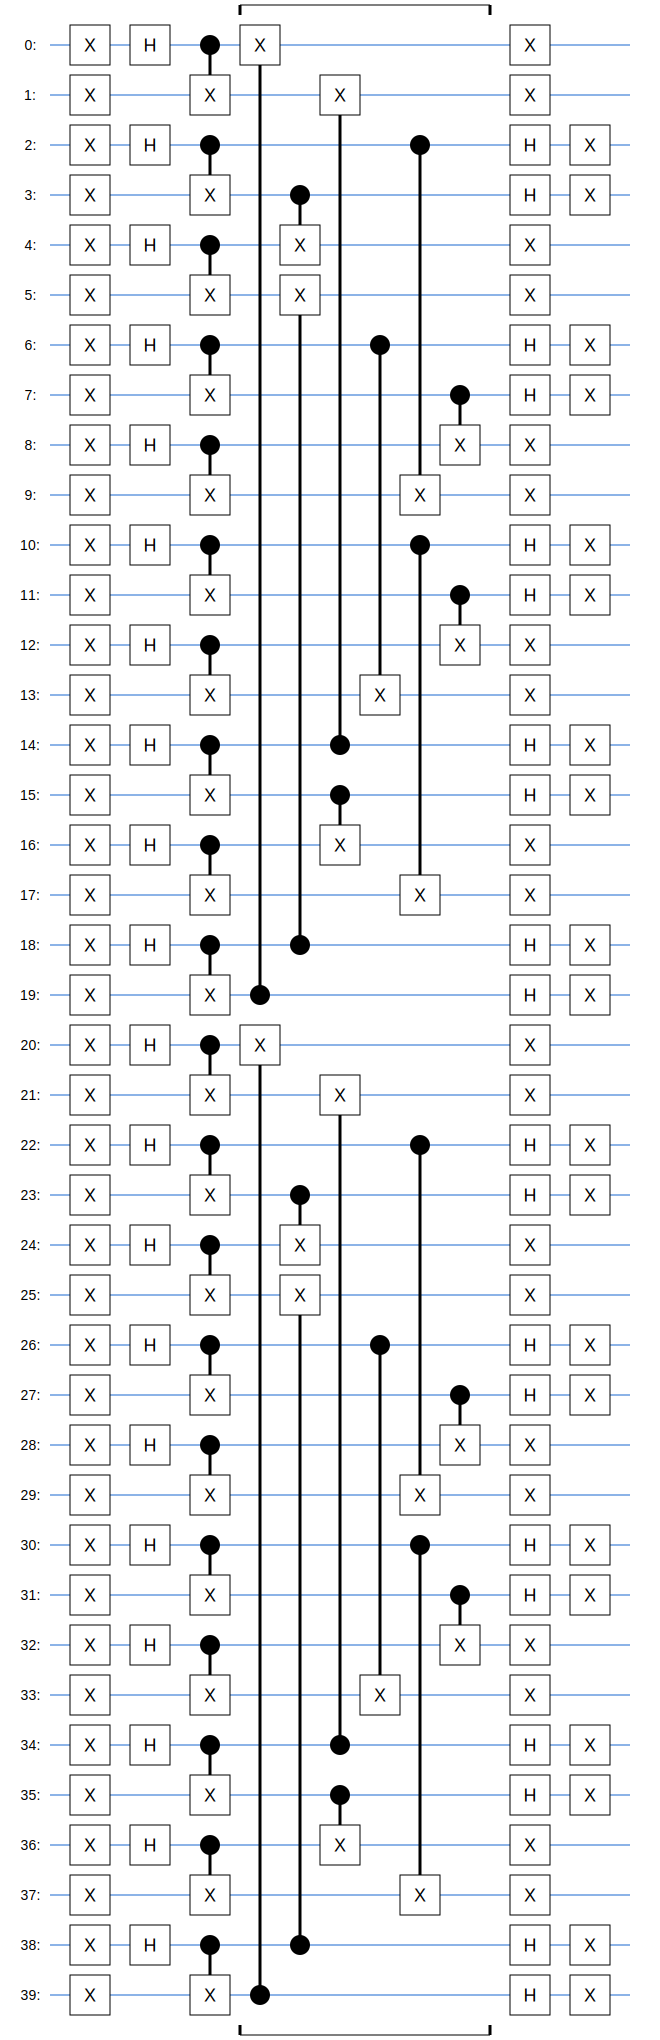

In [1303]:
N = 40
qubits = cirq.LineQubit.range(N)
circuit = cirq.Circuit()

tets = [cirq.Circuit(tc.ZeroTet(qubits[(i*4):(i*4+4)],False)) for i in range(10)]
for i,_ in enumerate(tets[0]): # we know these are parallel
    m = []
    for t in tets:
        m.append(t[i])
    circuit.append(cirq.Moment(m))

circuit.append([
        tc.entangle_tets(qubits, 
        [
            (19,0),(18,5),(14,1),(6,13),
            (2,9),(10,17),(3,4),(7,8),
            (11,12),(15,16)
        ]),
        tc.entangle_tets(qubits,
        [
            (39,20),(38,25),(34,21),(26,33),
            (22,29),(30,37),(23,24),(27,28),
            (31,32),(35,36)
        ])
])
SVGCircuit(circuit)

In [1150]:
''' testing the idea of two spacetime atoms '''
N = 40
reps = 1

qubits = cirq.LineQubit.range(N)
#circuit = cirq.Circuit(cirq.Moment([tc.ZeroTet(qubits[(i*4):(i*4+4)],False) for i in range(int(N/4))]))
circuit = cirq.Circuit([tc.ZeroTet(qubits[(i*4):(i*4+4)],False) for i in range(int(N/4))])
circuit.append(
    tc.entangle_tets(qubits,
                     [(3,4),(2,9),(6,13),(7,8),(10,17),(11,12),(14,1),(18,5),(19,0),(15,16),
                      (23,24),(22,29),(26,33),(27,28),(30,37),(31,32),(34,21),(38,25),(39,20),(35,36)
                     ]
                    )
)



In [1154]:
''' NOISE single tet '''

N = 4
reps = 1000
qubits = cirq.LineQubit.range(N)

circuit = cirq.Circuit(tc.ZeroTet(qubits))
circuit.append(tc.entangle_tets(qubits,[(0,3),(1,2)]))
circuit = tc.noisify(circuit,.01)
circuit.append(cirq.measure(*qubits,key='z'))

sim = cirq.Simulator()
results = sim.run(circuit,repetitions=reps)

hist = results.histogram(key='z')
print(hist)

Counter({0: 209, 15: 200, 12: 198, 3: 189, 2: 29, 14: 25, 8: 24, 1: 23, 11: 22, 13: 18, 7: 18, 4: 11, 6: 11, 9: 9, 10: 8, 5: 6})


In [1160]:
for key,item in hist.items():
    s = tc.binformat(N).format(key)
    print(s,item)
    
hnew, snew = tc.post_select_even(hist,4)
print(hnew)
print(hnew[0]/snew)

1111 200
1100 198
0000 209
1110 25
0011 189
1000 24
0010 29
0001 23
1011 22
0100 11
1001 9
0110 11
1101 18
1010 8
0111 18
0101 6
{15: 200, 12: 198, 0: 209, 3: 189, 9: 9, 6: 11, 10: 8, 5: 6}
0.25180722891566265


In [1161]:
''' NOISE dipole '''
''' dipole spin starting in |0>
'''
N = 8
reps = 1000

qubits = cirq.LineQubit.range(N)
circuit = cirq.Circuit(tc.ZeroTet(qubits[:4]),tc.ZeroTet(qubits[4:]))
circuit.append(tc.entangle_tets(qubits,[(0,4),(1,5),(2,6),(3,7)]))
circuit = tc.noisify(circuit,.01)
circuit.append(cirq.measure(*qubits,key='z'))

sim = cirq.Simulator()
results = sim.run(circuit, repetitions=reps)
hist = results.histogram(key='z')

print('circuit is {} moments'.format(len(circuit)))
# should be ~.0625
print('Expectation 0 with noise: ',hist[0]/reps)

circuit is 27 moments
Expectation 0:  0.023


In [1163]:
hnew, snew = tc.post_select_even(hist,8)
print(hnew)
print(hnew[0])
print(hnew[0]/snew)

{195: 42, 243: 36, 60: 27, 226: 7, 75: 5, 15: 25, 63: 25, 120: 6, 192: 31, 0: 23, 255: 38, 204: 33, 207: 33, 221: 2, 116: 3, 225: 5, 210: 4, 33: 2, 51: 21, 219: 2, 187: 2, 68: 3, 252: 31, 80: 1, 10: 2, 3: 35, 45: 7, 12: 20, 240: 25, 72: 5, 48: 33, 141: 3, 216: 3, 17: 1, 126: 1, 149: 2, 136: 4, 231: 2, 54: 2, 18: 6, 154: 1, 20: 2, 198: 2, 180: 5, 46: 4, 125: 1, 30: 2, 238: 3, 123: 3, 34: 2, 29: 2, 246: 1, 178: 1, 183: 2, 58: 1, 156: 1, 222: 3, 189: 2, 53: 1, 129: 1, 175: 2, 66: 3, 139: 3, 135: 1, 36: 1, 83: 2, 96: 1, 209: 5, 237: 2, 9: 1, 43: 1, 232: 1, 172: 1, 77: 1, 215: 1, 190: 1, 228: 2, 111: 2, 92: 1, 184: 1, 108: 1, 71: 2, 5: 1, 159: 1, 132: 1, 24: 1}
23
0.03605015673981191


In [1305]:
c = cirq.Circuit()
#c.append(cirq.X(qubits[0]))
c.append(cirq.H(qubits[0]))
c.append(cirq.CNOT(qubits[0],qubits[1]))
s = cirq.Simulator()
r = s.simulate(c)
print(r)
print(tc.final_state(c))

measurements: (no measurements)
output vector: 0.707|00⟩ + 0.707|11⟩
[ 0.70710677+0.j  0.        +0.j -0.        +0.j  0.70710677+0.j]
